# data status of epel download

you can guess the linux distribution from epel download status.

we use source from https://data-analysis.fedoraproject.org/csv-reports/countme/totals.csv

我们采用epel的下载数据，来推测各个操作系统的市占比。

In [1]:
import pandas as pd
import numpy as np

VAR_BASEDIR = '/Users/wzh/Downloads/chrome_tmp/'

# data_df = pd.read_csv('https://data-analysis.fedoraproject.org/csv-reports/countme/totals.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df = pd.read_csv(VAR_BASEDIR + '/totals.csv')
data_df.head(3).T  # 观察前几列并转置方便观察

,0,1,2
week_start,2020-02-10,2020-02-10,2020-02-10
week_end,2020-02-16,2020-02-16,2020-02-16
hits,2,2,1
os_name,Fedora,Fedora,Fedora
os_version,31,31,31
os_variant,generic,generic,workstation
os_arch,x86_64,x86_64,x86_64
sys_age,3,3,3
repo_tag,fedora-modular-31,updates-released-f31,updates-released-modular-f31
repo_arch,x86_64,x86_64,x86_64


下载来的数据，比较乱，需要清理。

In [2]:
data_df.os_name.unique()  # 列出所有不同的操作系统

array(['Fedora', 'Generic', 'Fan-Linux OS',
       'Red Hat Enterprise Linux Server', 'Magic', 'NST', 'VirtOS',
       'Red Hat Enterprise Linux', 'SONICast', 'RedHat',
       'Private Void Enterprise Linux', 'CentOS Linux', 'SuperRed',
       'brynux', 'Fedora Remix for WSL', 'XF', 'Centos', 'Ubuntu',
       'OsoLinux', 'Fedoraa', 'FSystem', 'PetalOS', 'UXCloud',
       'Fedora-Android', 'JambulaOS', 'Top Hat', 'DeepFake',
       'Clear Linux OS', 'Will Woods Fan Club', 'Hongkong Linux',
       'Franky', 'Will Woods: secret vampire?',
       'Red Hat Enterprise Linux Workstation', 'Liri OS', 'ilo Pepola',
       'Waders', 'Ideco utm', 'WJSN Linux', 'idesk System', 'GNOME OS',
       'Keepod PRV', 'Wick', 'Ideco UTM', 'Mahan', 'Pingus',
       'SereneLinux', 'Lemonade OS', 'Novos', 'Broken Fedora',
       'CentOS Stream', 'Fedora Raven Edition', 'GSBvBIOS_NDA_10P.4.4',
       'Fedora Raven', 'Oracle Linux Server', 'fedora',
       'Springdale Open Enterprise Linux', 'TRACe', 'TIA', 'Cl

In [3]:
data_df.loc[data_df.os_name.str.contains('CentOS Stream'),'os_name'] = 'CentOS Stream'
data_df.loc[data_df.os_name.str.contains('Red Hat'),'os_name'] = 'RHEL'
data_df.loc[data_df.os_name.str.contains('RedHat'),'os_name'] = 'RHEL'
data_df.loc[data_df.os_name.str.contains('Fedora'),'os_name'] = 'Fedora'
data_df.loc[data_df.os_name.str.contains('fedora'),'os_name'] = 'Fedora'
data_df.loc[data_df.os_name.str.contains('Oracle'),'os_name'] = 'Oracle Linux'
data_df.loc[data_df.os_name.str.contains('CentOS Linux'),'os_name'] = 'CentOS Linux'
data_df.loc[data_df.os_name.str.contains('CentOS Release'),'os_name'] = 'CentOS Linux'
data_df.loc[data_df.os_name.str.contains('red hat'),'os_name'] = 'CentOS Linux'
data_df.loc[data_df.os_name.str.contains('centos'),'os_name'] = 'CentOS Linux'
data_df.loc[data_df.os_name.str.contains('Redflag'),'os_name'] = 'RedFlag Linux'
data_df.loc[data_df.os_name.str.contains('RedFlag'),'os_name'] = 'RedFlag Linux'
data_df.loc[data_df.os_name.str.contains('Asianux'),'os_name'] = 'RedFlag Linux'
data_df.loc[data_df.os_name.str.contains('Alibaba'),'os_name'] = 'Alibaba Linux'
# data_df.loc[data_df.os_name.str.contains('Chrome'),'os_name'] = 'Chrome OS'
data_df.loc[data_df.os_name.str.contains('AlmaLinux'),'os_name'] = 'AlmaLinux'
data_df.loc[data_df.os_name.str.contains('Anolis'),'os_name'] = 'Anolis'
data_df.loc[data_df.os_name.str.contains('anolis'),'os_name'] = 'Anolis'

data_df.loc[data_df.os_name.str.contains('Centos for'),'os_name'] = 'CentOS Linux'
data_df.loc[data_df.os_name.str.contains('CentOS Linux CAPS-OS'),'os_name'] = 'CentOS Linux'
data_df.loc[data_df.os_name.str.contains('Rocky'),'os_name'] = 'Rocky'
data_df.loc[data_df.os_name.str.contains('BigCloud'),'os_name'] = 'BC Linux'
data_df.loc[data_df.os_name.str.contains('on CentOS'),'os_name'] = 'CentOS Linux'
data_df.loc[data_df.os_name.str.contains('rhel'),'os_name'] = 'RHEL'
data_df.loc[data_df.os_name.str.contains('RHEL'),'os_name'] = 'RHEL'
data_df.loc[data_df.os_name.str.contains('SUSE'),'os_name'] = 'SUSE'
data_df.loc[data_df.os_name.str.contains('Centos'),'os_name'] = 'CentOS Linux'
data_df.loc[data_df.os_name.str.contains('SLES'),'os_name'] = 'SUSE'
data_df.loc[data_df.os_name.str.contains('CentOSLinux'),'os_name'] = 'CentOS Linux'
data_df.loc[data_df.os_name.str.contains('TencentOS'),'os_name'] = 'TencentOS'
data_df.loc[data_df.os_name.str.contains('fedora'),'os_name'] = 'Fedora'

data_df.loc[data_df.os_name == ('CentOS'),'os_name'] = 'CentOS Linux'


data_df.os_name.unique()  # 列出所有不同的操作系统

array(['Fedora', 'Generic', 'Fan-Linux OS', 'RHEL', 'Magic', 'NST',
       'VirtOS', 'SONICast', 'Private Void Enterprise Linux',
       'CentOS Linux', 'SuperRed', 'brynux', 'XF', 'Ubuntu', 'OsoLinux',
       'FSystem', 'PetalOS', 'UXCloud', 'JambulaOS', 'Top Hat',
       'DeepFake', 'Clear Linux OS', 'Will Woods Fan Club',
       'Hongkong Linux', 'Franky', 'Will Woods: secret vampire?',
       'Liri OS', 'ilo Pepola', 'Waders', 'Ideco utm', 'WJSN Linux',
       'idesk System', 'GNOME OS', 'Keepod PRV', 'Wick', 'Ideco UTM',
       'Mahan', 'Pingus', 'SereneLinux', 'Lemonade OS', 'Novos',
       'CentOS Stream', 'GSBvBIOS_NDA_10P.4.4', 'Oracle Linux',
       'Springdale Open Enterprise Linux', 'TRACe', 'TIA', 'CloudLinux',
       'VzB GSB Linux', 'NCRLinuxC', 'dracut', 'MatrixOS', 'Syneto Juno',
       'KVX', 'RedHawk Linux', 'SUSE', 'StaRT Linux', 'Linux OS',
       '\\xe7\\xbd\\x91\\xe7\\xbb\\x9c\\xe7\\xb3\\xbb\\xe7\\xbb\\x9f\\xe7\\xae\\xa1\\xe7\\x90\\x86\\xe9\\xa1\\xb9\\xe7\\x9b\\x

除了我们关心的操作系统，其他的都是others

In [4]:
os_list = ['CentOS Stream',
            'RHEL',
            'Fedora',
            'Oracle Linux',
            'CentOS Linux',
            'RedFlag Linux',
            'Alibaba Linux',
            'AlmaLinux',
            'Anolis',
            'Rocky',
            'BC Linux',
            'SUSE',
            'TencentOS'
            ]

data_df.loc[~data_df.os_name.isin(os_list), 'os_name'] = 'Others' # 去除操作系统列表中的操作系统
data_df.os_name.unique() 

array(['Fedora', 'Others', 'RHEL', 'CentOS Linux', 'CentOS Stream',
       'Oracle Linux', 'SUSE', 'RedFlag Linux', 'AlmaLinux',
       'Alibaba Linux', 'Anolis', 'BC Linux', 'Rocky', 'TencentOS'],
      dtype=object)

直接看汇总数据，最大的依次是： Fedora, Centos, RHEL, Centos Stream

In [5]:
cal_df = data_df.groupby(['os_name', 'week_end'])['hits'].sum().reset_index()

cal_df['week_end'] = pd.to_datetime(cal_df['week_end'])
cal_df = cal_df[cal_df['week_end']>=pd.to_datetime('2020-12-01')]

cal_df.to_csv(VAR_BASEDIR+"/total.group.csv", index=False)

cal_df.groupby(['os_name'])['hits'].sum().reset_index()
# cal_df.T

,os_name,hits
0,Alibaba Linux,614
1,AlmaLinux,444751
2,Anolis,281
3,BC Linux,194
4,CentOS Linux,34328197
5,CentOS Stream,2066341
6,Fedora,58204721
7,Oracle Linux,789109
8,Others,202890
9,RHEL,8089037


In [6]:
cal_df.T

,0,1,2,3,4,5,6,7,8,9,...,516,517,518,519,520,521,522,523,524,525
os_name,Alibaba Linux,Alibaba Linux,Alibaba Linux,Alibaba Linux,Alibaba Linux,Alibaba Linux,Alibaba Linux,Alibaba Linux,Alibaba Linux,Alibaba Linux,...,SUSE,SUSE,SUSE,SUSE,SUSE,SUSE,SUSE,SUSE,TencentOS,TencentOS
week_end,2021-02-07 00:00:00,2021-02-14 00:00:00,2021-02-21 00:00:00,2021-02-28 00:00:00,2021-03-07 00:00:00,2021-03-14 00:00:00,2021-03-21 00:00:00,2021-03-28 00:00:00,2021-04-04 00:00:00,2021-04-11 00:00:00,...,2021-05-16 00:00:00,2021-05-23 00:00:00,2021-05-30 00:00:00,2021-06-06 00:00:00,2021-06-20 00:00:00,2021-07-11 00:00:00,2021-08-01 00:00:00,2021-08-15 00:00:00,2021-08-01 00:00:00,2021-08-15 00:00:00
hits,6,5,7,7,14,6,7,3,5,1,...,14,56,70,12,22,1,1,26,1,5


我们画个图来对比一下

In [7]:
import matplotlib.pyplot as plt  # 作图
import seaborn as sns  # 作图

sns.set()
plt.figure(figsize=(15,10))
sns.lineplot(x='week_end', y='hits', hue='os_name', data=cal_df, sort=True, style='os_name')


<AxesSubplot:xlabel='week_end', ylabel='hits'>

挑出我们感兴趣的中国操作系统，对比一下，发现阿里的操作系统占比最高。当然数据上有问题，比如BC Linux，自己有EPEL repo，所以官方的repo看不到很多BC Linux的下载。

<AxesSubplot:xlabel='week_end', ylabel='hits'>

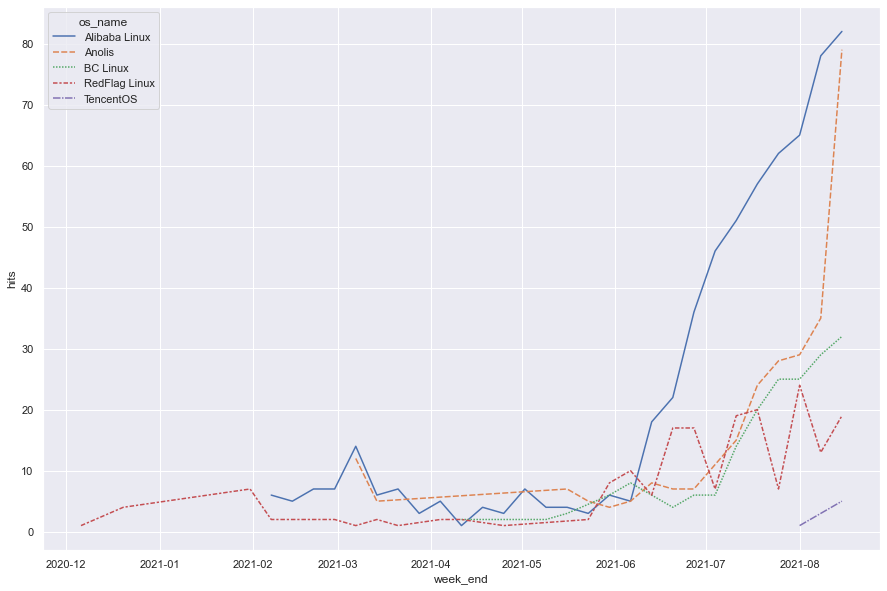

In [ ]:
china_os_list = [
            'RedFlag Linux',
            'Alibaba Linux',
            'Anolis',
            'BC Linux',
            'TencentOS'
            ]

cal_df_01 = cal_df[cal_df['os_name'].isin(china_os_list)]

sns.set()
plt.figure(figsize=(15,10))
sns.lineplot(x='week_end', y='hits', hue='os_name', data=cal_df_01, sort=True, style='os_name')

In [ ]:
os_list = [
            'AlmaLinux',
            'Rocky'
            ]

cal_df_02 = cal_df[cal_df['os_name'].isin(os_list)]

sns.set()
plt.figure(figsize=(15,10))
sns.lineplot(x='week_end', y='hits', hue='os_name', data=cal_df_02, sort=True, style='os_name')